In [14]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("insurance_data.csv")

In [2]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [3]:
df.shape

(1340, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [5]:
numeric_columns = df.select_dtypes(exclude = ["object"])
numeric_columns

,index,PatientID,age,bmi,bloodpressure,children,claim
0,0,1,39.0,23.2,91,0,1121.87
1,1,2,24.0,30.1,87,0,1131.51
2,2,3,NaN,33.3,82,0,1135.94
3,3,4,NaN,33.7,80,0,1136.40
4,4,5,NaN,34.1,100,0,1137.01
...,...,...,...,...,...,...,...
1335,1335,1336,44.0,35.5,88,0,55135.40
1336,1336,1337,59.0,38.1,120,1,58571.07
1337,1337,1338,30.0,34.5,91,3,60021.40
1338,1338,1339,37.0,30.4,106,0,62592.87


In [6]:
categoric_columns = df.select_dtypes(include = ["object"])
categoric_columns

,gender,diabetic,smoker,region
0,male,Yes,No,southeast
1,male,No,No,southeast
2,male,Yes,No,southeast
3,male,No,No,northwest
4,male,No,No,northwest
...,...,...,...,...
1335,female,Yes,Yes,northwest
1336,female,No,Yes,northeast
1337,male,Yes,Yes,northwest
1338,male,No,Yes,southeast


In [11]:
obj = (df.dtypes == 'object')
object_variable = list(obj[obj].index)
print("Categorical variables:",len(object_variable))
 
int_ = (df.dtypes == 'int64')
integer_variable = list(int_[int_].index)
print("Integer variables:",len(integer_variable))
 
fl = (df.dtypes == 'float')
float_variable = list(fl[fl].index)
print("Float variables:",len(float_variable))

Categorical variables: 4
Integer variables: 4
Float variables: 3


In [12]:
integer_variable

['index', 'PatientID', 'bloodpressure', 'children']

In [13]:
df.nunique()

index            1340
PatientID        1340
age                43
gender              2
bmi               275
bloodpressure      61
diabetic            2
children            6
smoker              2
region              4
claim            1337
dtype: int64

In [14]:
df = df.drop(["index","PatientID"], axis=1)#deleting columns with the same number of values as shape

In [15]:
df.isna().sum()

age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [16]:
df = df.dropna()#dropping missing values

In [17]:
df.isna().sum().sum()

0

In [18]:
df.duplicated().sum()#duplicate values ke liyueeeee

0

C:\Users\kushp\AppData\Local\Temp\ipykernel_13452\1924828241.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


(<AxesSubplot: >,)

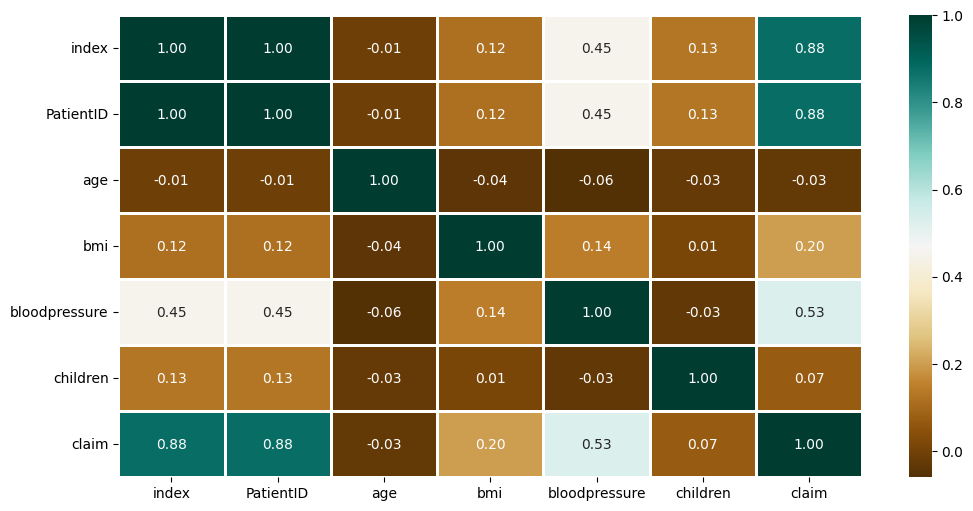

In [5]:
plt.figure(figsize=(12, 6))#heatmap kaaa codeeee
sns.heatmap(df.corr(),
cmap = 'BrBG',
fmt = '.2f',
linewidths = 2,
annot = True),

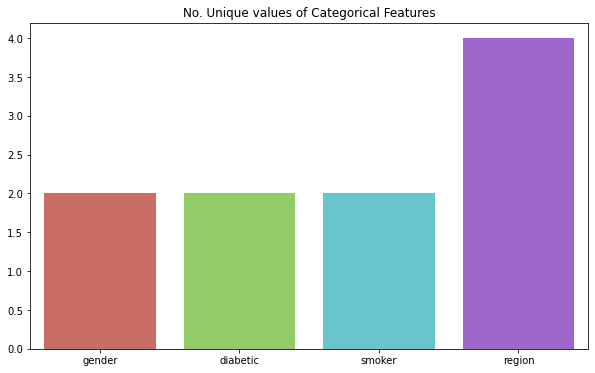

In [21]:
unique_values = []
for i in object_variable:
    unique_values.append(df[i].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
#plt.xticks(rotation=40)
sns.barplot(x=object_variable,y=unique_values,palette="hls")
plt.show()

C:\Users\amogh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\amogh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\amogh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\amogh\anaconda3\lib\si

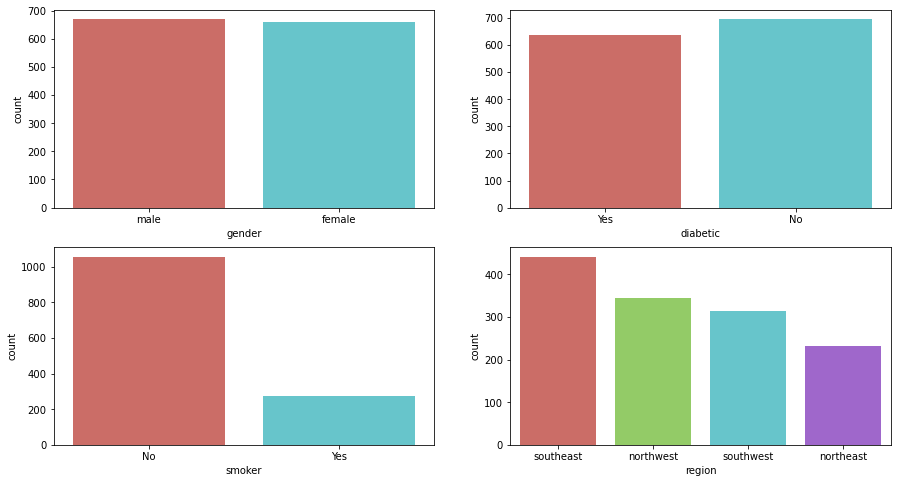

In [22]:
plt.figure(figsize = (15, 8))
number = 1
row = 2
for i in categoric_columns:
    plt.subplot(row, 2, number)
    sns.countplot(df[i], palette="hls")
    number += 1

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'bloodpressure'}>,
        <AxesSubplot:title={'center':'children'}>],
       [<AxesSubplot:title={'center':'claim'}>, <AxesSubplot:>]],
      dtype=object)

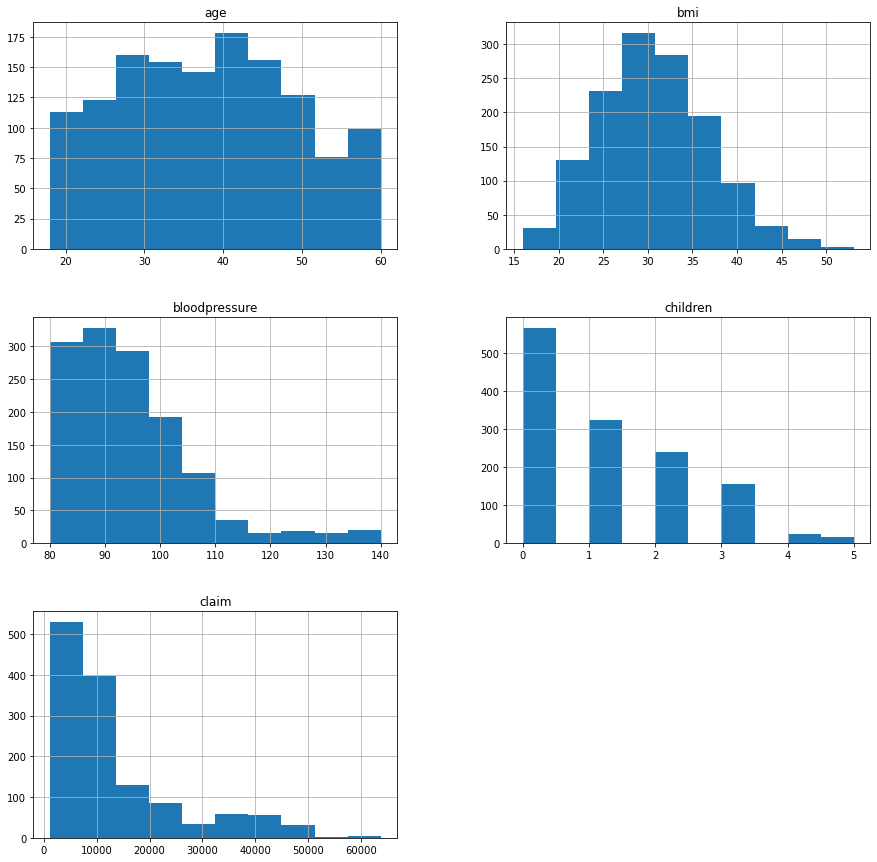

In [23]:
df.hist(figsize=(15,15))

In [24]:
categoric_columns.columns

Index(['gender', 'diabetic', 'smoker', 'region'], dtype='object')

In [25]:
categoric_feature_list = categoric_columns.columns.tolist()
categoric_feature_list

['gender', 'diabetic', 'smoker', 'region']

In [16]:
df_final = pd.get_dummies(df)

In [28]:
df_final.head()

,age,bmi,bloodpressure,children,claim,gender_female,gender_male,diabetic_No,diabetic_Yes,smoker_No,smoker_Yes,region_northeast,region_northwest,region_southeast,region_southwest
0,39.0,23.2,91,0,1121.87,0,1,0,1,1,0,0,0,1,0
1,24.0,30.1,87,0,1131.51,0,1,1,0,1,0,0,0,1,0
7,19.0,41.1,100,0,1146.80,0,1,1,0,1,0,0,1,0,0
8,20.0,43.0,86,0,1149.40,0,1,1,0,1,0,0,1,0,0
9,30.0,53.1,97,0,1163.46,0,1,1,0,1,0,0,1,0,0


In [29]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1332 entries, 0 to 1339
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1332 non-null   float64
 1   bmi               1332 non-null   float64
 2   bloodpressure     1332 non-null   int64  
 3   children          1332 non-null   int64  
 4   claim             1332 non-null   float64
 5   gender_female     1332 non-null   uint8  
 6   gender_male       1332 non-null   uint8  
 7   diabetic_No       1332 non-null   uint8  
 8   diabetic_Yes      1332 non-null   uint8  
 9   smoker_No         1332 non-null   uint8  
 10  smoker_Yes        1332 non-null   uint8  
 11  region_northeast  1332 non-null   uint8  
 12  region_northwest  1332 non-null   uint8  
 13  region_southeast  1332 non-null   uint8  
 14  region_southwest  1332 non-null   uint8  
dtypes: float64(3), int64(2), uint8(10)
memory usage: 75.4 KB


In [30]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [17]:
X = df_final.drop(['claim'], axis=1)
y = df_final['claim']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [33]:
print("Dataset train contains:", X_train.shape[0], "rows and ", X_train.shape[1], "columns")
print("Dataset test contains:", X_test.shape[0], "rows and ", X_test.shape[1], "columns")

print("Variable target to train contains:", y_train.shape[0], "rows")
print("Variable target to test contains:", y_test.shape[0], "rows")

Dataset train contains: 1065 rows and  14 columns
Dataset test contains: 267 rows and  14 columns
Variable target to train contains: 1065 rows
Variable target to test contains: 267 rows


In [34]:
#NOW WE USEEE 3 MACHIHNE LEARNINGG MODELLL
#1.RANDOM FORESTTT
#2.SVM
#lR

In [35]:
from sklearn import svm #SVM
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,y_train)
y_predict = model_SVR.predict(X_test)

print(mean_absolute_percentage_error(y_test, y_predict))

1.0105388209920059


In [36]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)#rfr
model_RFR.fit(X_train, y_train)
y_predict = model_RFR.predict(X_test)

print(mean_absolute_percentage_error(y_test, y_predict))

0.65811746101627


In [37]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
y_predict = model_LR.predict(X_test)

print(mean_absolute_percentage_error(y_test, y_predict))

0.7063619710643911


<AxesSubplot:>

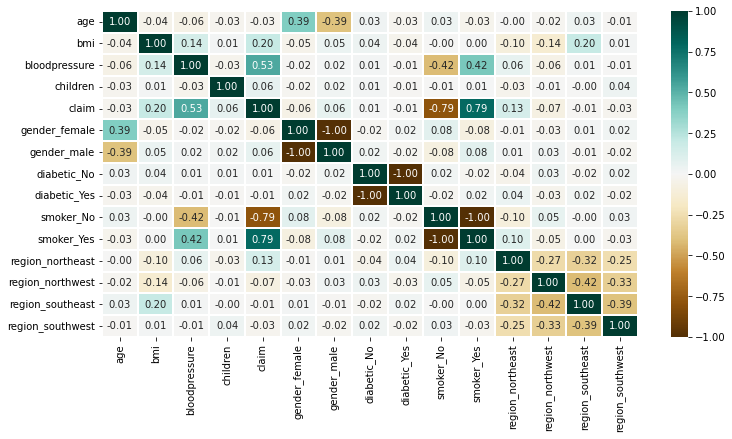

In [38]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_final.corr(),
cmap = 'BrBG',
fmt = '.2f',
linewidths = 2,
annot = True)

In [39]:
df['diabetic'] = df['diabetic'].replace({'Yes': 'diabetic', 'No': 'non-diabetic'})
df['children'] = df['children'].replace({0 : 'none', 1 : 'one', 2:'two', 3:'three', 4:'four', 5:'five', 6:'six'})
df['smoker'] = df['smoker'].replace({'Yes': 'smoker', 'No': 'non-smoker'})

In [40]:
age_range = [13,28,46,58,61]
labels = ['Gen Z','Millennials', 'Gen X', 'Baby Boomers']
df['age_group'] = pd.cut(df['age'], age_range,labels=labels)
ageGroup = df[['age_group', 'claim']].groupby('age_group').mean().sort_values(by="claim", ascending=True)

In [41]:
bmi_range = [15.5,18.5,24.9,29.9,60]

labels = ['Underweight','Healthy Weight', 'Overweight', 'Obese']
#df['bmi_group'] = pd.cut(df['bmi'], bins=bmi_range)
df['bmi_group'] = pd.cut(df['bmi'], bmi_range, labels=labels)
bmiGroup = df[['bmi_group', 'claim']].groupby('bmi_group').mean().sort_values(by="claim", ascending=True)

In [42]:
bloodpressure_range = [71,120,129,139,148]
labels = ['Normal Blood Pressure', 'Elevated Blood Pressure', 'Hypertension Stage 1','Hypertension Stage 2']
df['bloodpressure_group'] = pd.cut(df['bloodpressure'], bloodpressure_range, labels = labels)
bloodpressureGroup = df[['bloodpressure_group', 'claim']].groupby('bloodpressure_group').mean().sort_values(by="claim", ascending=True)

<AxesSubplot:title={'center':'Claims per Region'}, ylabel='region'>

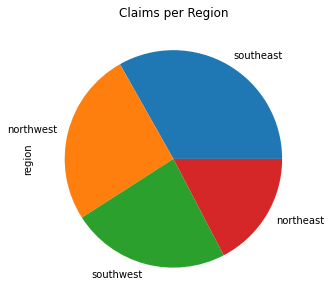

In [43]:
plt.figure(figsize = (10,5))
plt.title("Claims by Region")
df['region'].value_counts().plot(kind='pie', title = "Claims per Region")

<AxesSubplot:title={'center':'Gender by Region'}, xlabel='gender', ylabel='count'>

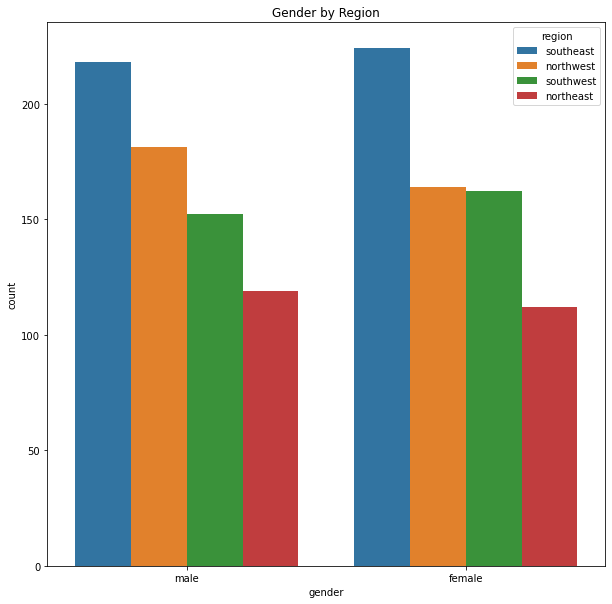

In [55]:

plt.figure(figsize = (10,10))
#plt.subplot(1,2,1)

plt.title("Gender by Region")
sns.countplot(x = 'gender', hue = 'region', data = df)

<AxesSubplot:title={'center':'Claims per Age Group'}, ylabel='age_group'>

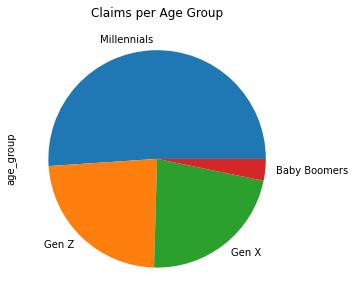

In [45]:
plt.figure(figsize = (10,5))

df['age_group'].value_counts().plot(kind='pie', title = "Claims per Age Group")

<AxesSubplot:title={'center':'BMI Ranges'}, ylabel='bmi_group'>

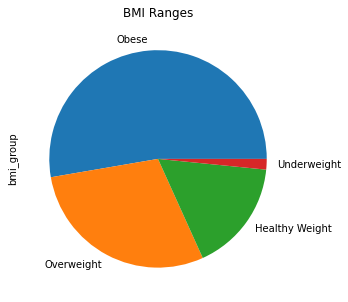

In [47]:
plt.figure(figsize = (10,5))
df['bmi_group'].value_counts().plot(kind='pie', title = "BMI Ranges")

<AxesSubplot:xlabel='bmi', ylabel='claim'>

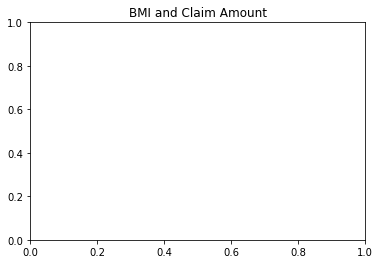

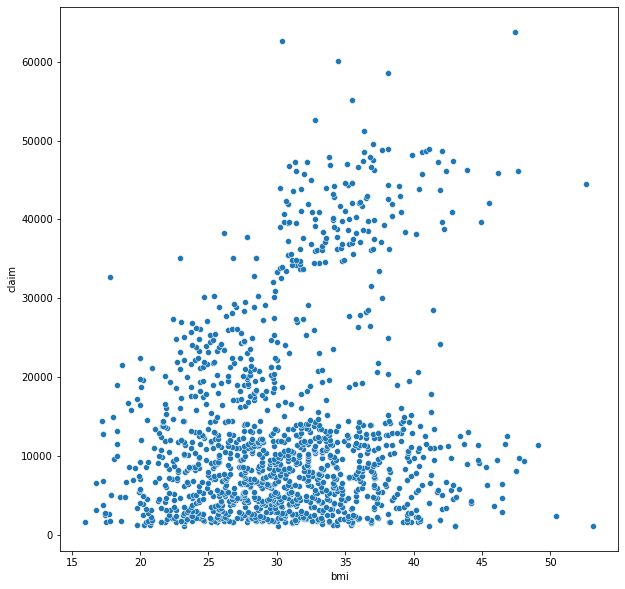

In [59]:
plt.title("BMI and Claim Amount")
plt.figure(figsize=(10,10))


sns.scatterplot(x=df['bmi'], y=df['claim'])

Text(0, 0.5, 'Claim Amounts')

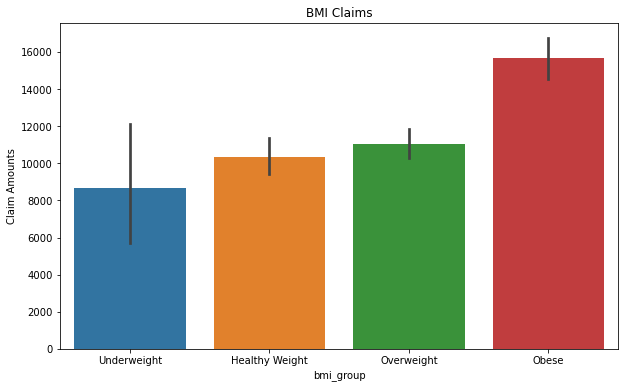

In [49]:
plt.figure(figsize=(10,6))
plt.title("BMI Claims")
sns.barplot(x=df.bmi_group, y=df['claim'])
plt.ylabel("Claim Amounts")

Text(0, 0.5, 'Claim Amounts')

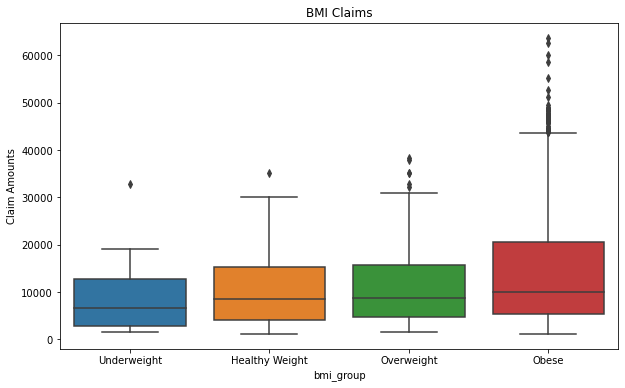

In [50]:
plt.figure(figsize=(10,6))
plt.title("BMI Claims")
sns.boxplot(x=df.bmi_group, y=df['claim'])
plt.ylabel("Claim Amounts")

<AxesSubplot:title={'center':'Correlation between Blood Pressure and Generation'}, xlabel='age_group', ylabel='count'>

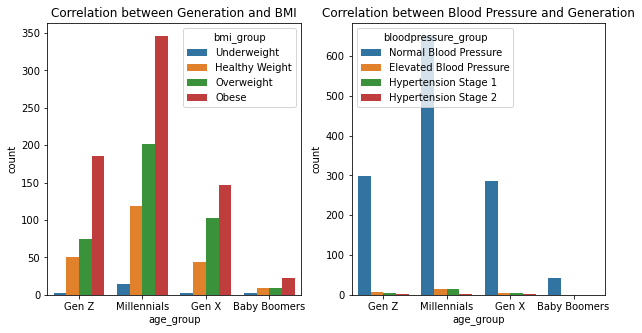

In [62]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)

plt.title("Correlation between Generation and BMI")
sns.countplot(x ='age_group', hue = 'bmi_group', data = df)


plt.subplot(1,2,2)

plt.title("Correlation between Blood Pressure and Generation")
sns.countplot(x = 'age_group', hue = 'bloodpressure_group', data = df)

<AxesSubplot:xlabel='age_group', ylabel='count'>

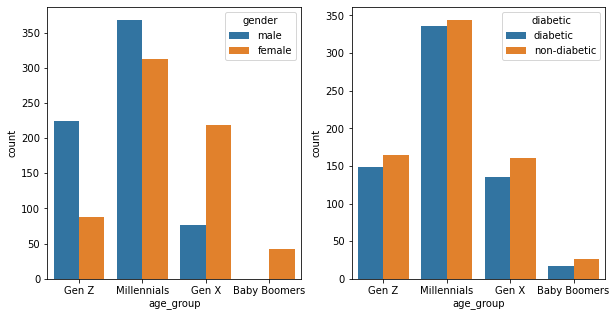

In [63]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'age_group', hue = 'gender', data = df)

plt.subplot(1,2,2)
sns.countplot(x ='age_group', hue = 'diabetic', data = df)

<AxesSubplot:title={'center':'Correlation of Generations and Children'}, xlabel='age_group', ylabel='count'>

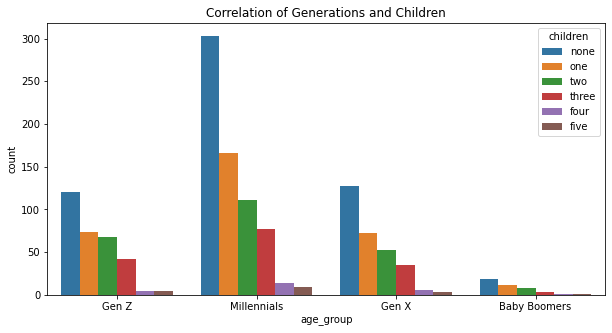

In [64]:
plt.figure(figsize = (10,5))
plt.title("Correlation of Generations and Children")
sns.countplot( x = 'age_group', hue = 'children', data = df)

Text(0, 0.5, 'Claim Amount')

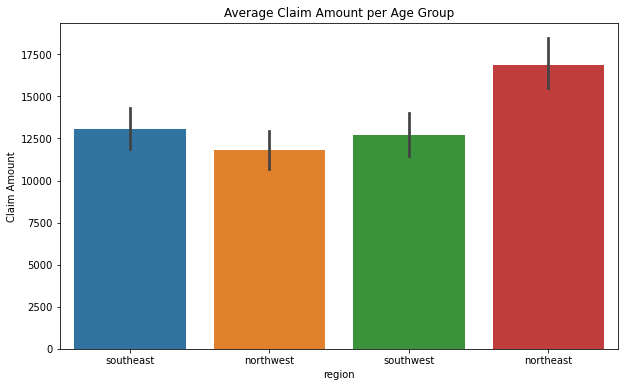

In [65]:
plt.figure(figsize=(10,6))
plt.title("Average Claim Amount per Age Group")
sns.barplot(x=df.region, y=df['claim'])
plt.ylabel("Claim Amount")

Text(0, 0.5, 'Region')

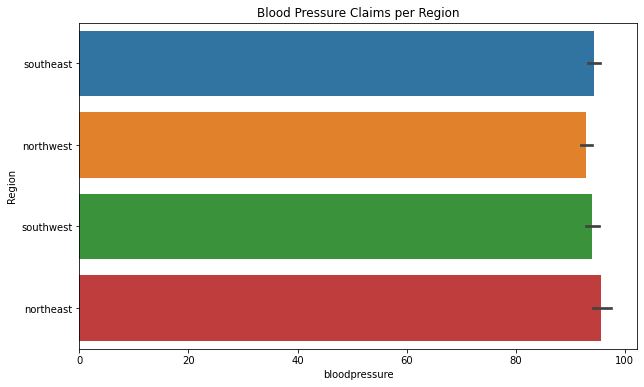

In [66]:
plt.figure(figsize=(10,6))
plt.title("Blood Pressure Claims per Region")
sns.barplot(x=df.bloodpressure, y=df['region'])
plt.ylabel("Region")

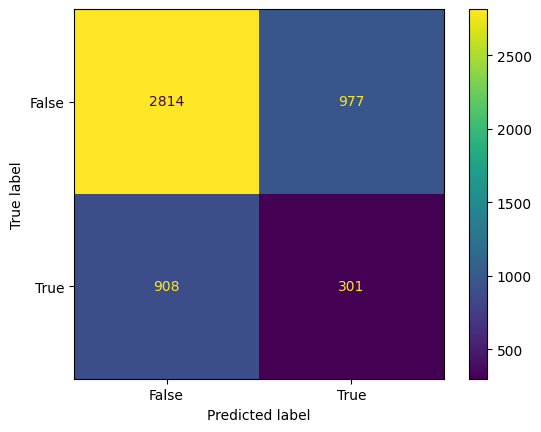

In [19]:
from sklearn import metrics 
import matplotlib as plt
actual = np.random.binomial(1,.25,size = 5000)
predicted = np.random.binomial(1,.25,size = 5000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

In [10]:
import sklearn 
from sklearn import preprocessing
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.decomposition import PCA

In [21]:
wcss =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

ValueError: could not convert string to float: 'male'

# OBSERVATIONS
Patients in the Southeast have significantly more claims than any other region.
#The vast majority of these claims are among millennials. Obesity is a prevalent factor among claim recipients. 
#This is of great concern due to millennials being parents to the majority of children currently under 18 years old. 
#If this pattern continues future generations will be prone to obesity which will lead to perpetual illness and excessive medical costs.

# Solutions
40 to 50 hours of nutritional education per year are needed to positively affect behavior change. Currently students receive less than 8 hours of nutritional education each year. School administrators and teachers have the ability to literally shape the future. Opportunities to teach healthy lifestyles are abundant in all grades. Teaching math by counting fruits and vegetables, planting school gardens and introducing tasty healthy food options in the cafeteria are just a few ways that children can be taught to eat to live instead of living to eat.
## Next steps necessary
State and local government officials should coordinate with school administrators to ensure schools have the needed resources to teach healthy eating habits. Teachers should enlist the help of their students when creating lessons that center on healthy lifestyles. Additionally, some activities and events can be structured to include the entire family. These actions will put millennials and their children on track to better health outcomes.

# IN All WE USED 3 MACHINE LEARNING MODELS
1.Linear Regression
2.Support Vector Machines
3.Random Forest Regression
When we calculated the mean absolute errors we realized that Random Forest produced the least error thats why for further prediction Random forest is the best option